# Adding Custom Toolbar and Toolbutton to napari Example

This notebook shows how to create the custom toolbar with one checkable toolbutton and how to add the toolbar directly to napari or to another plotter widget. In this example, we show it with the HistogramWidget from napari-matplotlib.

In [1]:
import napari
from napari.utils import nbscreenshot
from napari_matplotlib import HistogramWidget
from nap_plot_tools import CustomToolbarWidget
import numpy as np
from pathlib import Path

c:\Users\mazo260d\mambaforge\envs\napari-ss-npt-dev\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Create a napari viewer and a plotter widget.

In [2]:
viewer = napari.Viewer()

plotter = HistogramWidget(viewer)

Define a path to icons (icons should be small .png files, 100px x 100px). 

In [3]:
icon_folder_path = Path().parent.resolve().parent / 'src/nap_plot_tools/icons'

Create empty toolbar.

In [4]:
custom_toolbar = CustomToolbarWidget()

Add toolbutton to toolbar. Callback can be set now upon creaton or later. Here we show how to connect it later.

In [5]:
custom_toolbar.add_custom_button(name='select',
                                 tooltip="Select something", 
                                 default_icon_path=Path(icon_folder_path / "select.png"),
                                 checkable=True, 
                                 checked_icon_path=Path(icon_folder_path / "select_checked.png")
                                 )

In [6]:
def callback_function(state):
    if state:
        print('Selection Activated!')
    else:
        print('Selection Deactivated!')

Connect button to callback

In [7]:
custom_toolbar.connect_button_callback(name='select', callback=callback_function)

 ## Adding toolbar directly to napari

In [8]:
viewer.window.add_dock_widget(custom_toolbar, area='right', name='custom_toolbar')

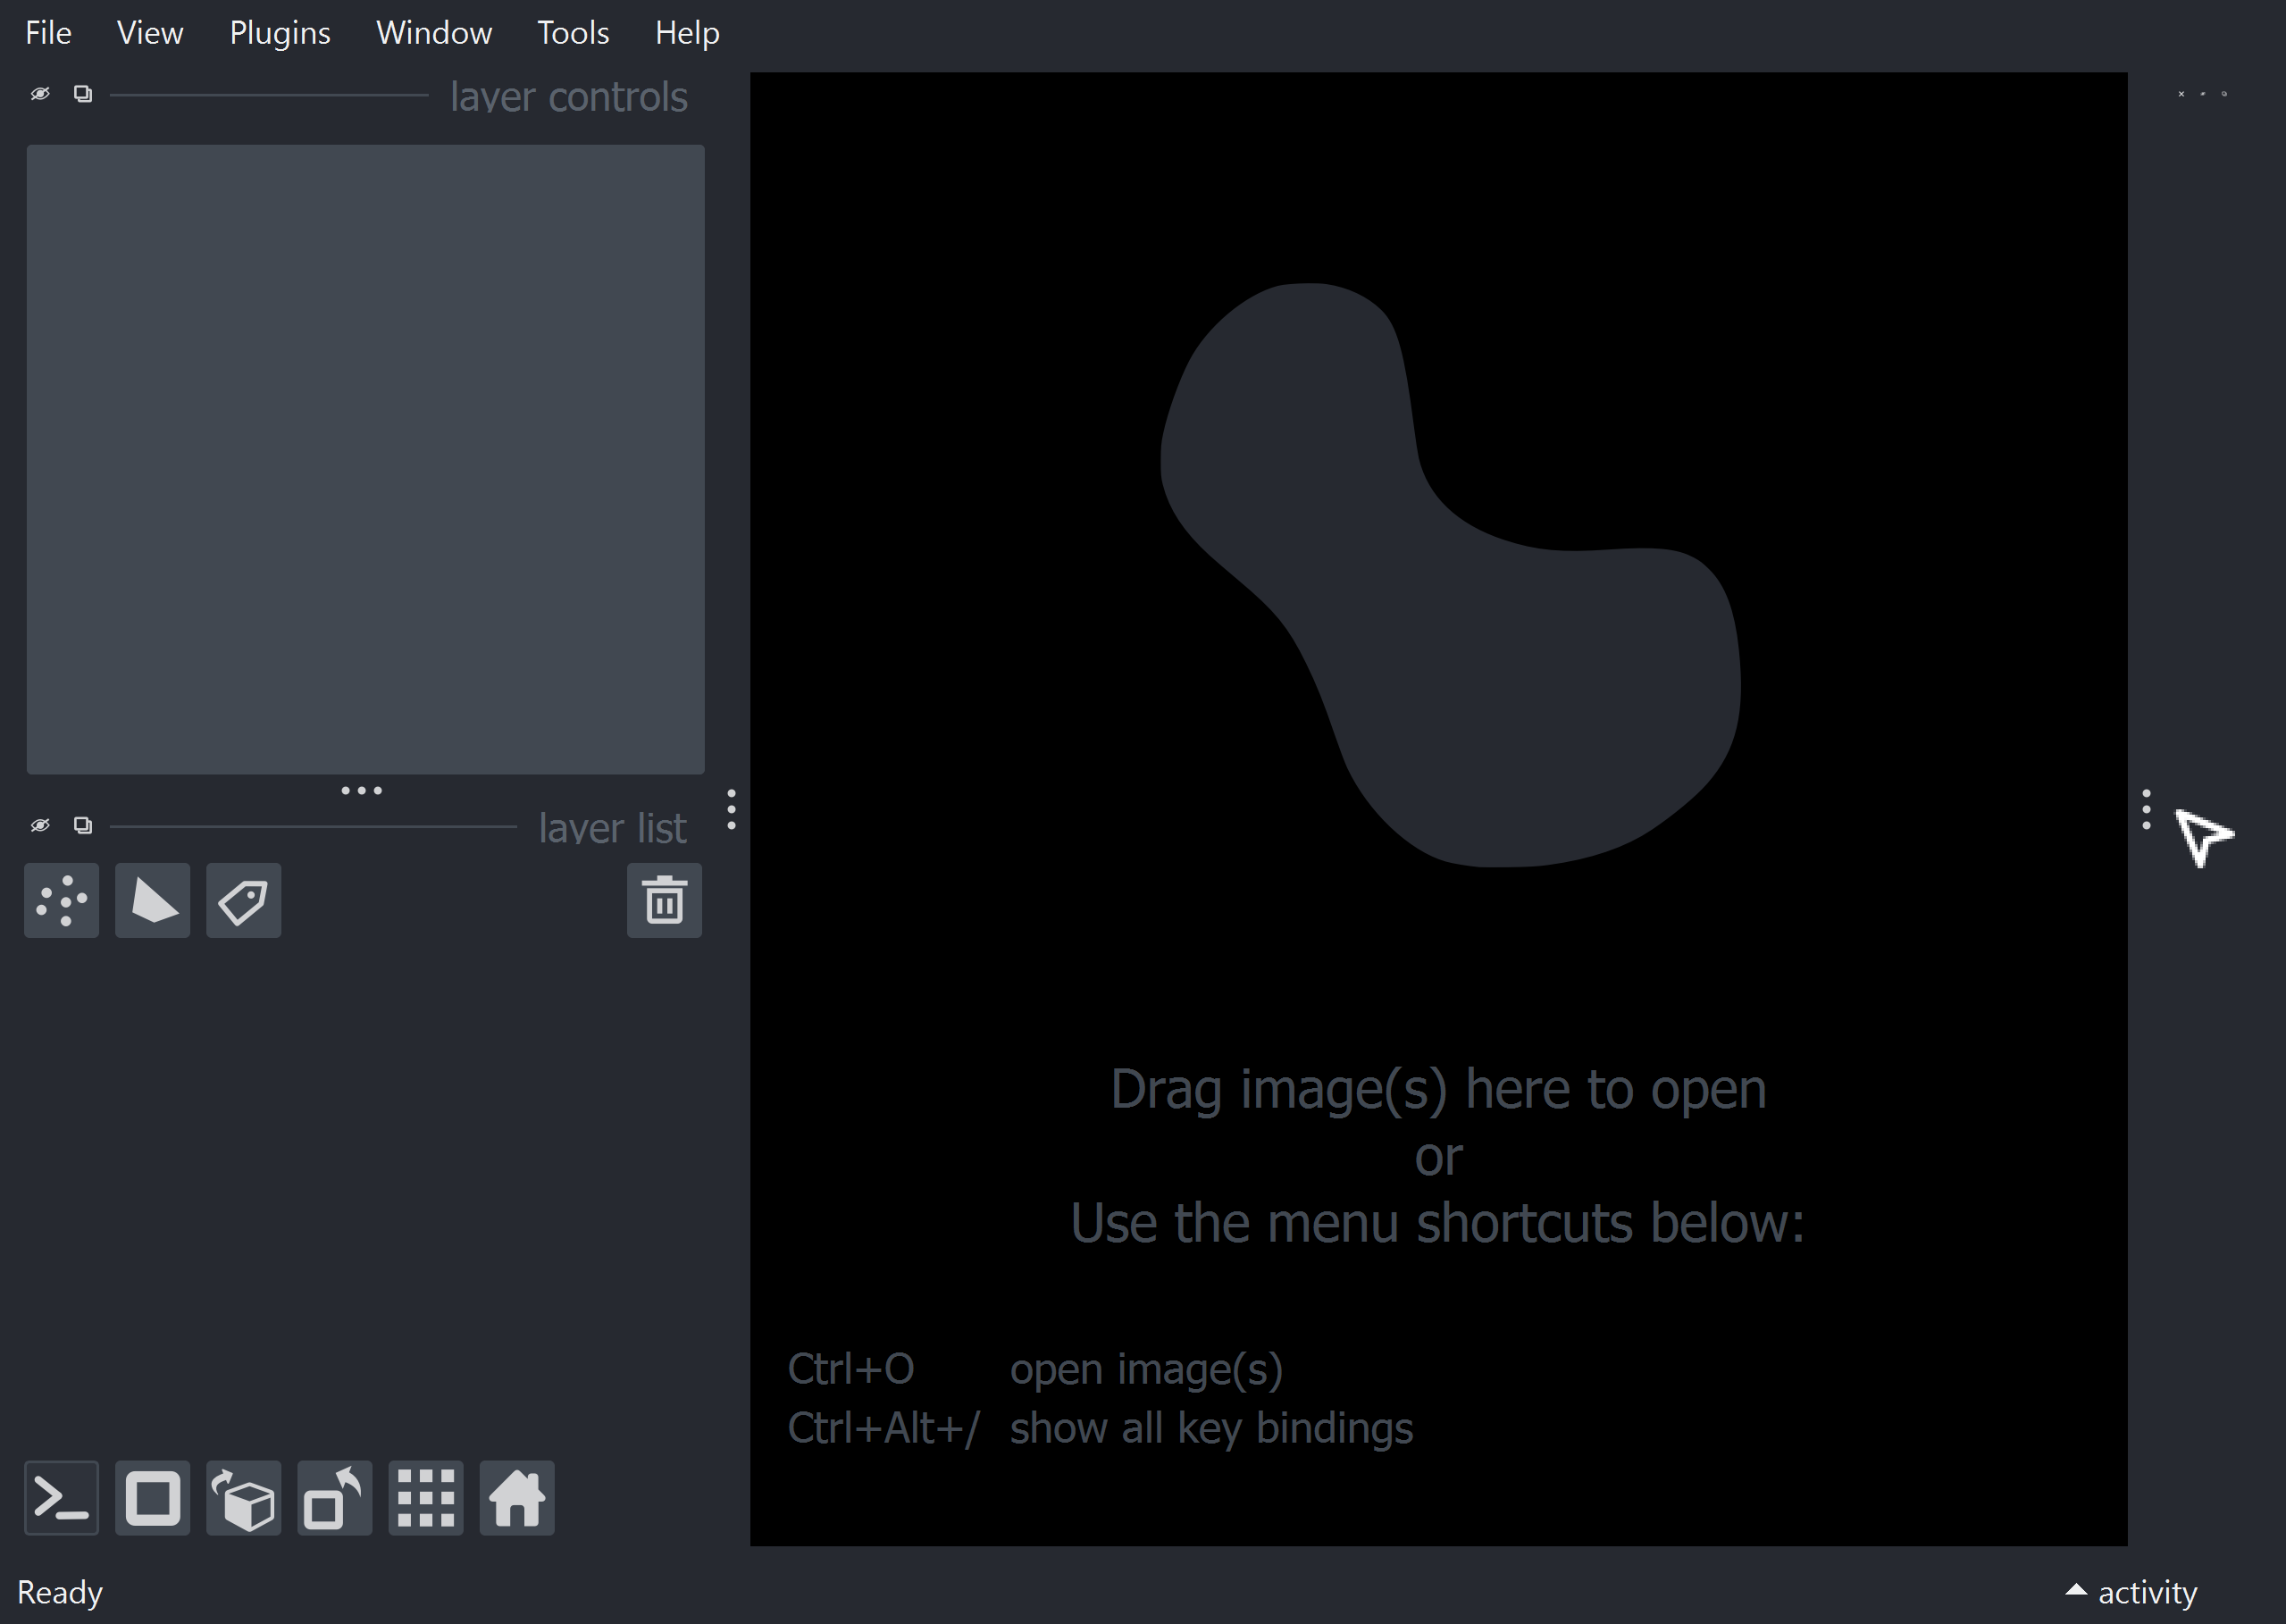

Selection Activated!
Selection Deactivated!


In [9]:
nbscreenshot(viewer)

## Adding/inserting toolbar to another pyqt-based plotter

In [8]:
plotter.layout().insertWidget(2, custom_toolbar)

Add random image and plotter to napari.

In [9]:
viewer.add_image(np.random.rand(20, 20))
viewer.window.add_dock_widget(plotter, area='right')

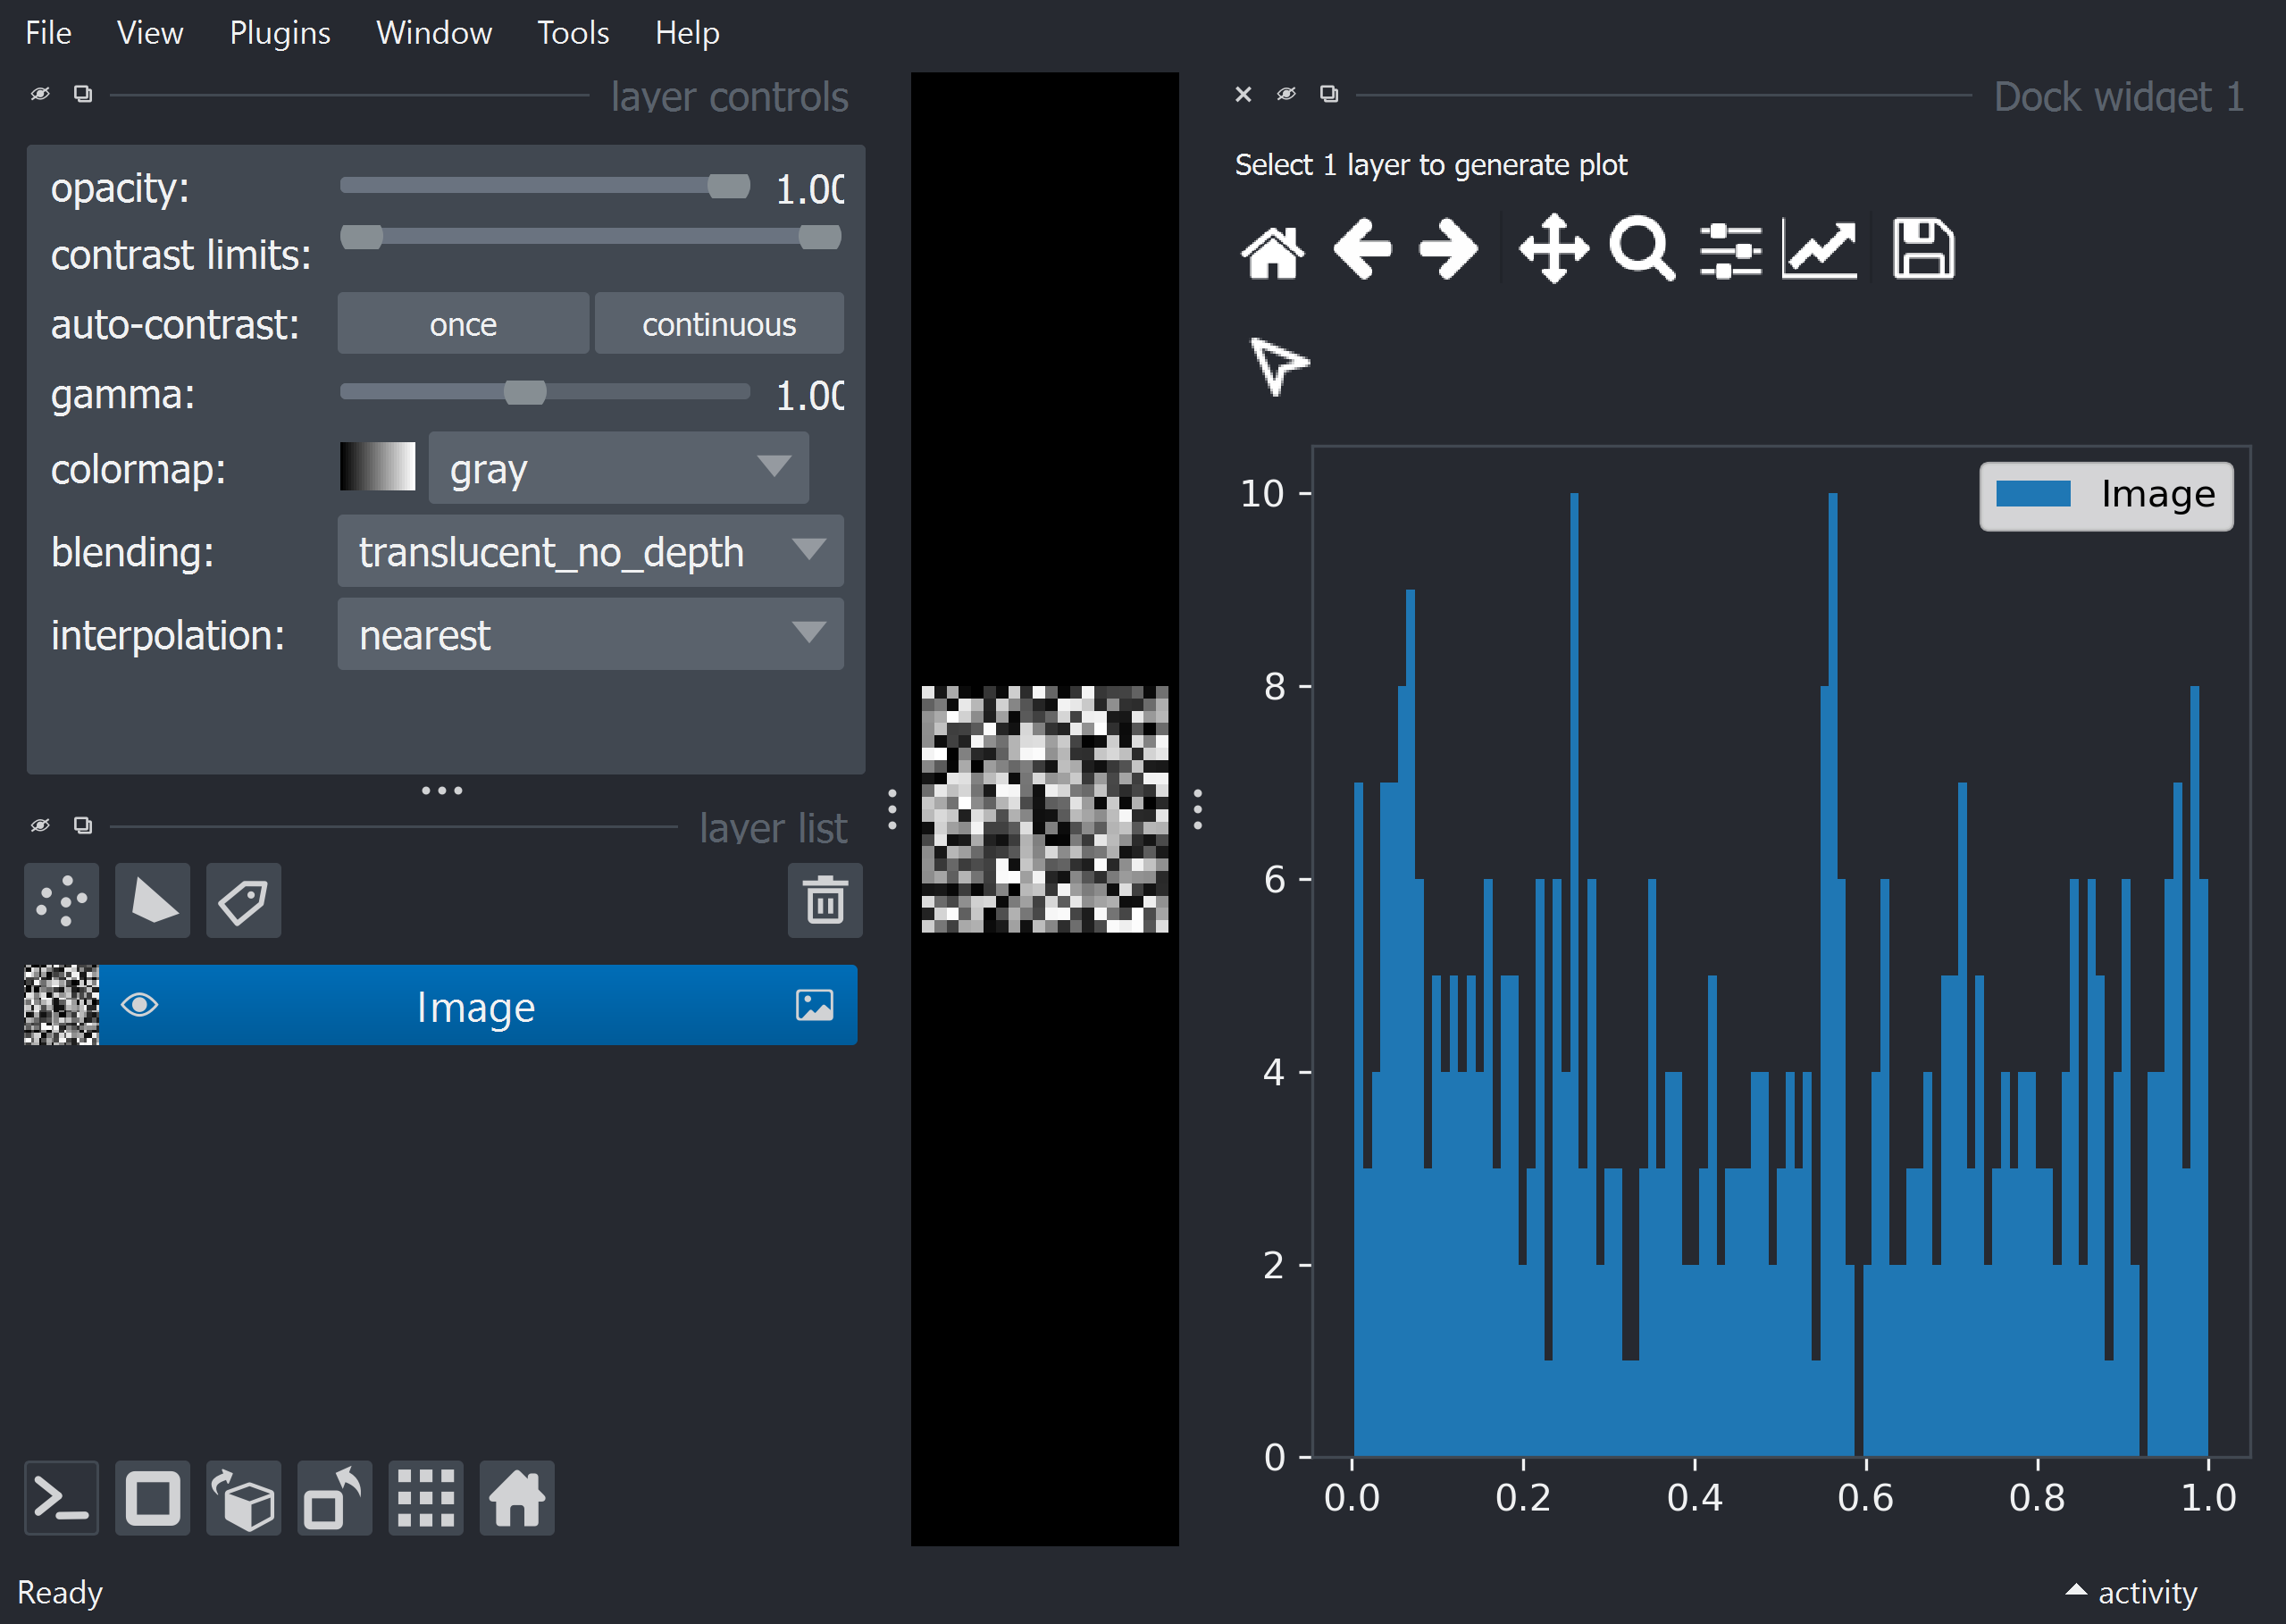

In [10]:
nbscreenshot(viewer)

Disconnecting event

In [11]:
custom_toolbar.disconnect_button_callback(name='select', callback=callback_function)

Removing button

In [12]:
custom_toolbar.remove_button(name='select')

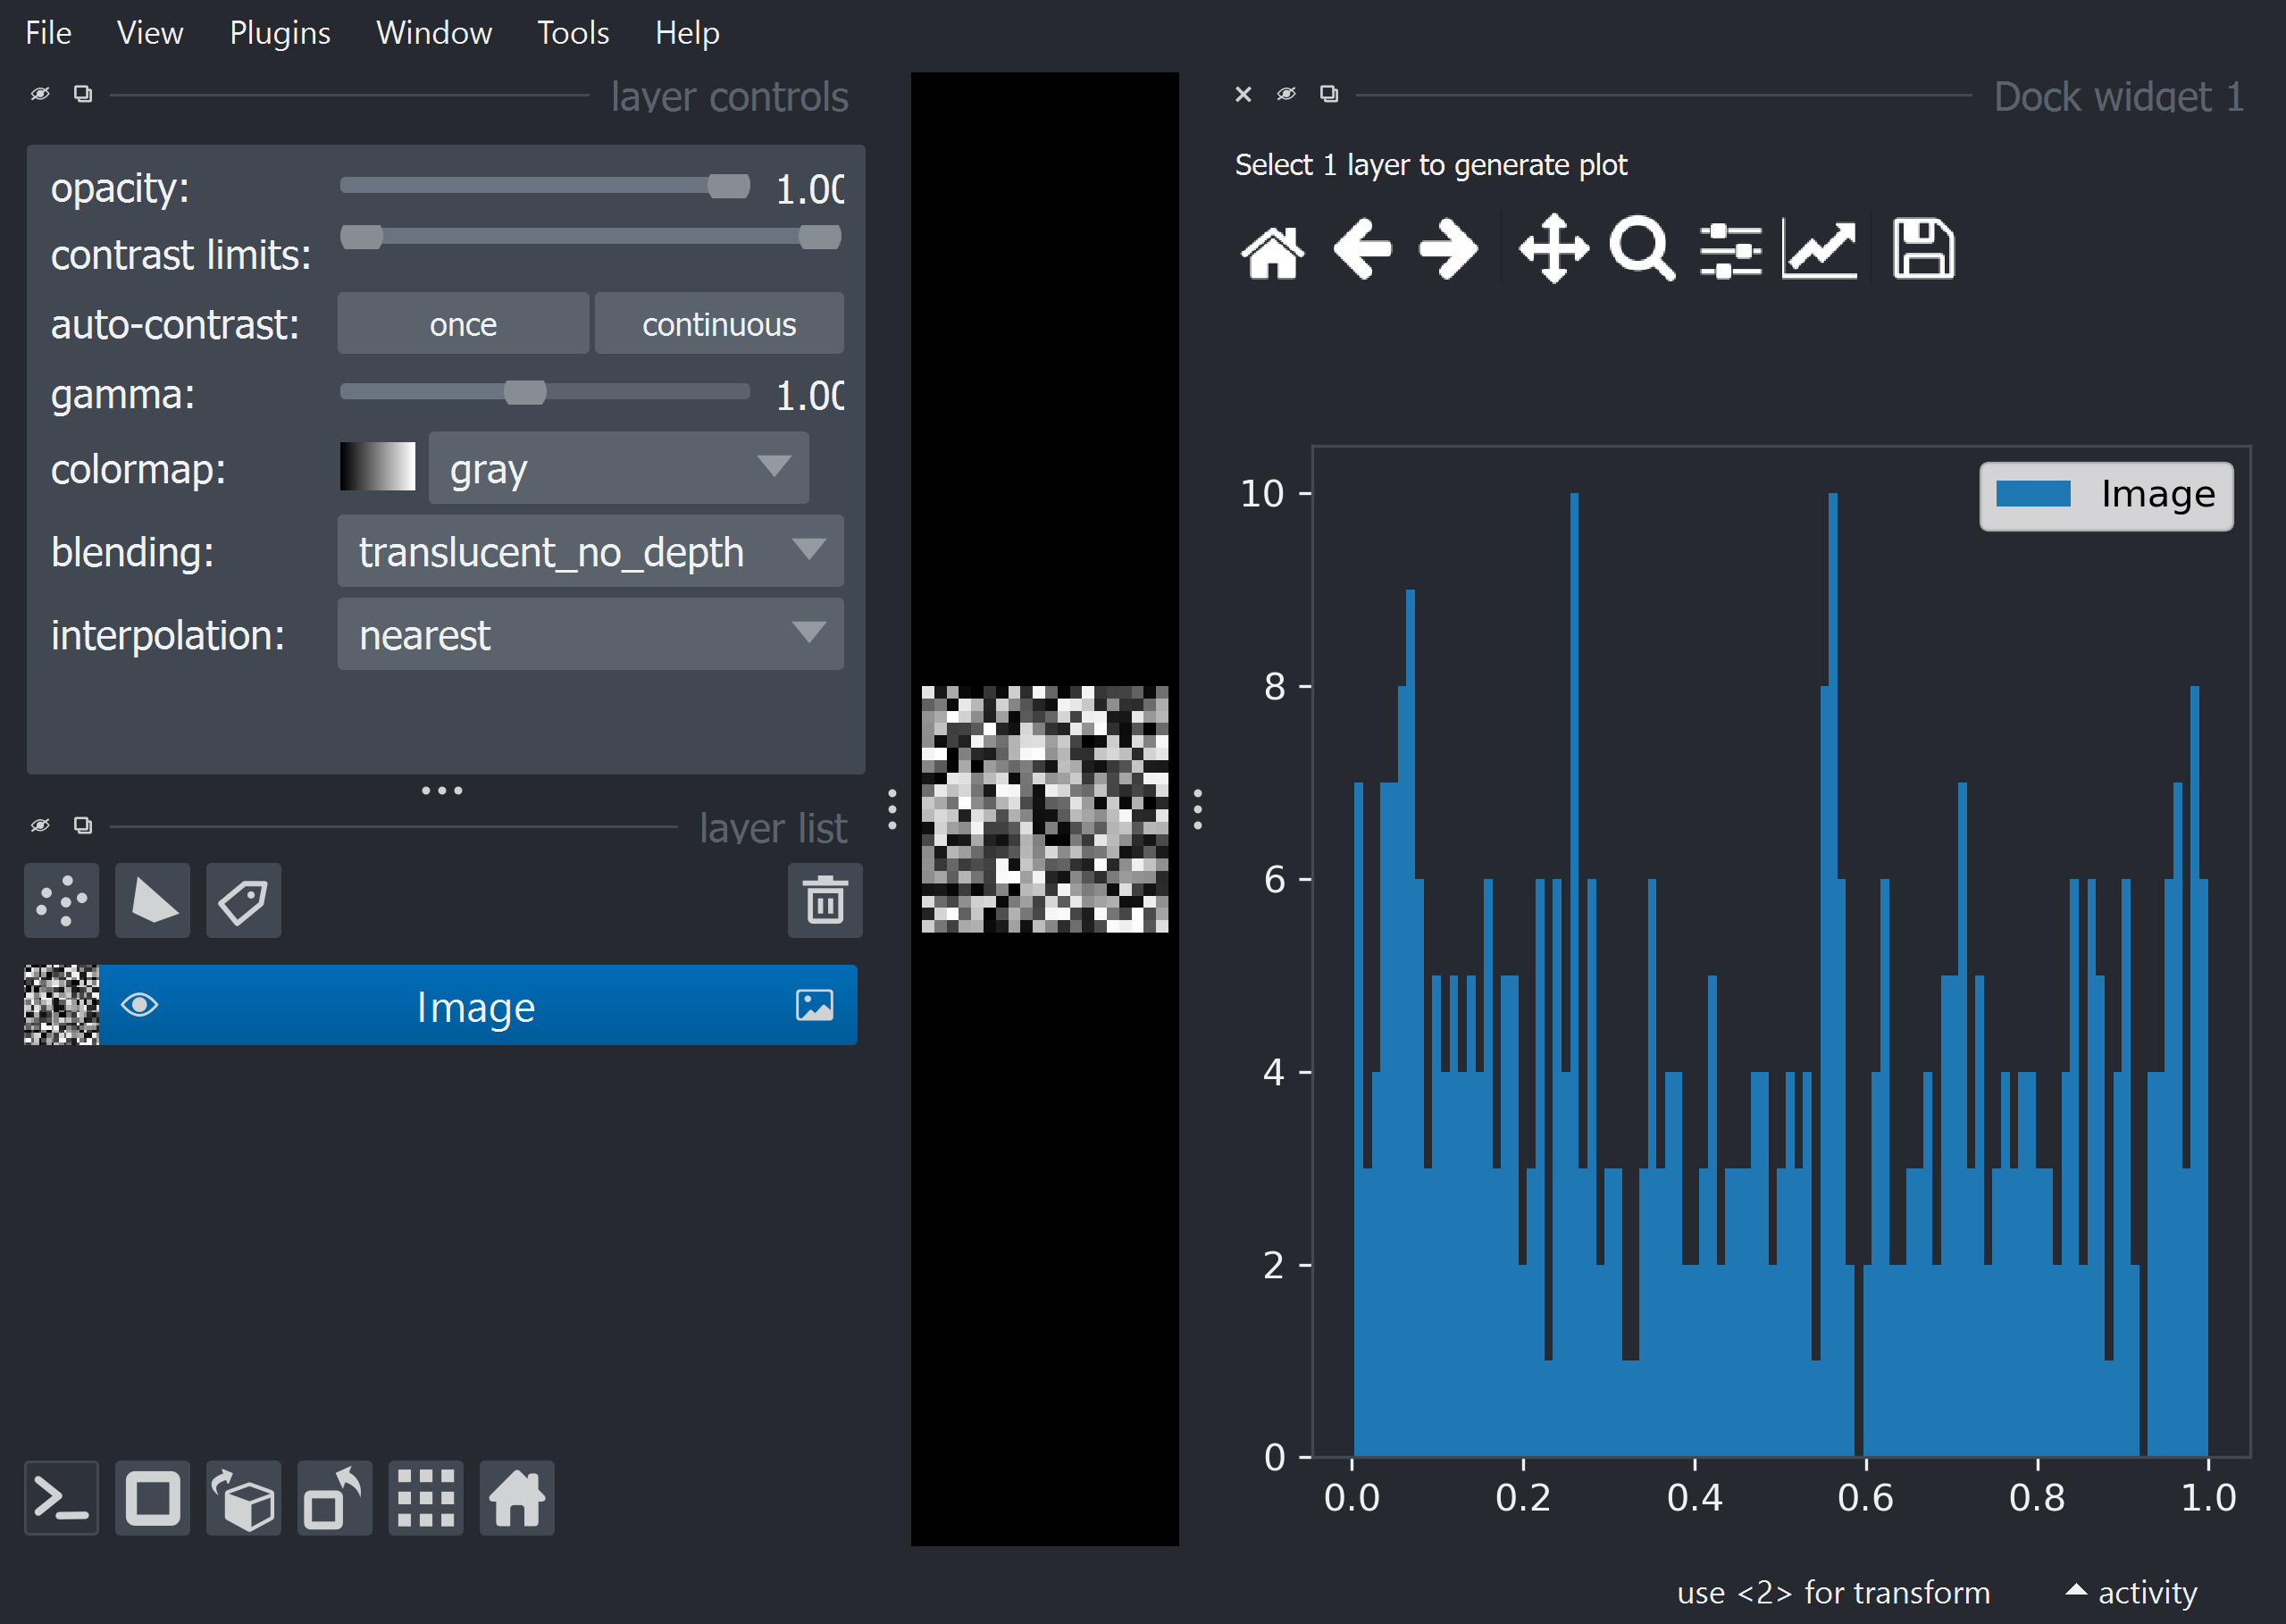

In [13]:
nbscreenshot(viewer)